In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from research.dataImporting.dataTools import butter_bandpass_filter
sig_A_Path = r"C:\Users\rclendening\researchData\EscapeCell_DataWav\A2\A2R1P2\Phone_2-4.wav"
sig_B_Path = r"C:\Users\rclendening\researchData\EscapeCell_DataWav\A2\A2R1P2\Phone_3-4.wav"
sig_C_Path = r"C:\Users\rclendening\researchData\EscapeCell_DataWav\A2\A2R1P2\Phone_6-4.wav"
sig_A, sampleRate = librosa.load(sig_A_Path, sr=8000)
sig_B, sampleRate = librosa.load(sig_B_Path, sr=8000)
sig_C, sampleRate = librosa.load(sig_C_Path, sr=8000)

sig_A_sample= sig_A[int(8000*20.5):int(8000*21)]
sig_B_sample= sig_B[int(8000*20.5):int(8000*21)]
sig_C_sample= sig_C[int(8000*20.5):int(8000*21)]
def lag_finder(y1, y2, sr):
    n = len(y1)
    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])
    print(corr)
    print(corr*np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)]))

    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    print('y2 is ' + str(delay*343) + ' meters behind y1')

    plt.figure()
    plt.plot(delay_arr, corr)
    plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
    plt.xlabel('Lag')
    plt.ylabel('Correlation coeff')
    plt.show()

# Sine sample with some noise and copy to y1 and y2 with a 1-second lag
sr=8000
sig_A_sample=butter_bandpass_filter(sig_A_sample,400,800,8000)
sig_B_sample=butter_bandpass_filter(sig_B_sample,400,800,8000)
sig_C_sample=butter_bandpass_filter(sig_C_sample,400,800,8000)
lag_finder(sig_A_sample, sig_B_sample, sr)
lag_finder(sig_A_sample, sig_C_sample, sr)
lag_finder(sig_B_sample, sig_C_sample, sr)
# sr = 1024
# y = np.linspace(0, 2*np.pi, sr)
# y = np.tile(np.sin(y), 5)
# y += np.random.normal(0, 5, y.shape)
# y1 = y[sr:4*sr]
# y2 = y[:3*sr]
#
# lag_finder(y1, y2, sr)

[ 0.01222253  0.04409035  0.06822241 ...  0.00299369 -0.00881017
 -0.02017963]
[ 0.04115067  0.14844279  0.22969031 ...  0.01007912 -0.02966196
 -0.06794051]



KeyboardInterrupt



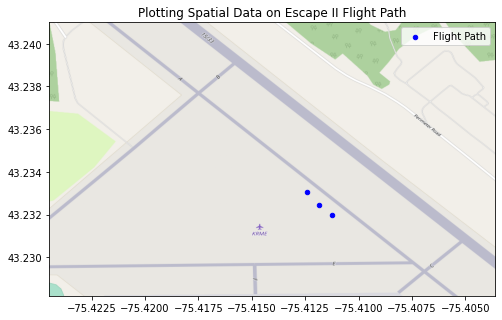

In [32]:
BBox = [-75.4300, -75.4036, 43.2257, 43.2435]
mymap = plt.imread(r"C:\Users\rclendening\Downloads\map2.png")
phonesLat=[43.232435, 43.23197528, 43.23308154]

phonesLon=[-75.4118794, -75.41124801,-75.41243727]

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(x=np.asarray(phonesLon), y=np.asarray(phonesLat), zorder=1, alpha=1, c='b',
           s=20, label="Flight Path")
#ax.scatter(x=centerLon, y=centerLat,marker="*", zorder=1, alpha=1, c='r',
#           s=100, label="CoM")

#ax.scatter(x=phonesLon, y=phonesLat, zorder=1, alpha=1, c='y',
#           s=20, label="Phone Locations")

#circle1 = plt.Circle(xy=(centerLon, centerLat), radius=0.0018, color='red', fill=False, label="Detection Radius")
#ax.add_patch(circle1)
ax.set_title('Plotting Spatial Data on Escape II Flight Path')
ax.set_xlim(BBox[0]+.0055, BBox[1])
ax.set_ylim(BBox[2]+.0025, BBox[3]-.0025)
plt.legend()
ax.imshow(mymap, zorder=0, extent=BBox, aspect='equal')
plt.savefig("lfScenario.pdf",dpi=1200)

In [30]:
def distance_calc(x1,x2,y1,y2):
    print(11.1*10**4*np.sqrt(np.square(x1-x2)+np.square(y1-y2)))
distance_calc(phonesLat[0],phonesLat[1],phonesLon[0],phonesLon[1])
distance_calc(phonesLat[1],phonesLat[2],phonesLon[1],phonesLon[2])
distance_calc(phonesLat[0],phonesLat[2],phonesLon[0],phonesLon[2])

86.69347369520214
180.29046770231346
94.78859987109693
